In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
df = pd.read_csv('data/dig_first.csv', names=['Department', 'Name', 'Staff', 'Authors', 'Title', 'DOI'], header=0)

In [3]:
df.head()

,Department,Name,Staff,Authors,Title,DOI
0,NaN,"Harris, Paul",No,Khachatryan V; Sirunyan AM; Tumasyan A; Adam W...,Observation of the rare B-s(0)->mu(+)mu(-) dec...,10.1038/nature14474
1,Physics,"Tobin, Mark",No,Khachatryan V; Sirunyan AM; Tumasyan A; Adam W...,Observation of the rare B-s(0)->mu(+)mu(-) dec...,10.1038/nature14474
2,NaN,"Li, Weizhong",No,Khachatryan V; Sirunyan AM; Tumasyan A; Adam W...,Observation of the rare B-s(0)->mu(+)mu(-) dec...,10.1038/nature14474
3,Chemistry,"Wang, Zhenxin",No,Khachatryan V; Sirunyan AM; Tumasyan A; Adam W...,Observation of the rare B-s(0)->mu(+)mu(-) dec...,10.1038/nature14474
4,School of Engineering,"Thomas, C",No,Khachatryan V; Sirunyan AM; Tumasyan A; Adam W...,Observation of the rare B-s(0)->mu(+)mu(-) dec...,10.1038/nature14474


In [4]:
df.shape

(759668, 6)

In [5]:
print(df.columns)
for col in df.columns:
    print('Column {} has {} unique entries'.format(col, len(df[col].unique())))

Index(['Department', 'Name', 'Staff', 'Authors', 'Title', 'DOI'], dtype='object')
Column Department has 130 unique entries
Column Name has 21861 unique entries
Column Staff has 2 unique entries
Column Authors has 173228 unique entries
Column Title has 224243 unique entries
Column DOI has 146268 unique entries


In [60]:
# Aggregate papers by department
department_aggregate = df.groupby(['Department']).count()
department_aggregate

,Name,Staff,Authors,Title,DOI
Department,,,,,
Academic Quality And Standards Division,825,825,812,814,796
"Archaeology, Classics and Egyptology",4932,4932,4756,4849,2708
Architecture,9418,9418,9230,9321,6875
Biochemistry,12597,12597,12541,12570,10654
Biostatistics,4046,4046,3970,3986,2736
...,...,...,...,...,...
Virtual Engineering Centre,1852,1852,1841,1846,1764
Women's and Children's Health,4987,4987,4895,4925,3569
"Work, Organisation and Management",1265,1265,1221,1259,622


In [58]:
# Percentage contribution by each department
pct = department_aggregate['DOI'] / df['DOI'].count() * 100
pct.sort_values(ascending=False)

Department
Physics                                   7.654898
Electrical Engineering and Electronics    7.585811
Management School                         7.471672
Chemistry                                 6.540420
School of Engineering                     4.045935
                                            ...   
Occupational Health Service               0.000000
Research and Impact Strategy              0.000000
Research, Partnerships and Innovation     0.000000
Safety Office                             0.000000
Legal Services                            0.000000
Name: DOI, Length: 129, dtype: float64

In [44]:
# Top five departments ranked by number of papers published
department_aggregate[['DOI']].sort_values(by=['DOI'], ascending=False).head()

,DOI
Department,
Physics,48087
Electrical Engineering and Electronics,47653
Management School,46936
Chemistry,41086
School of Engineering,25416


In [43]:
# Bottom five departments ranked by number of papers published
department_aggregate[['DOI']].sort_values(by=['DOI'], ascending=False).tail()

,DOI
Department,
Continuing Professional Development,0
Communications and Public Affairs,0
Careers And Employability,0
ZZ (DO NOT USE) was Business Gateway,0
Legal Services,0


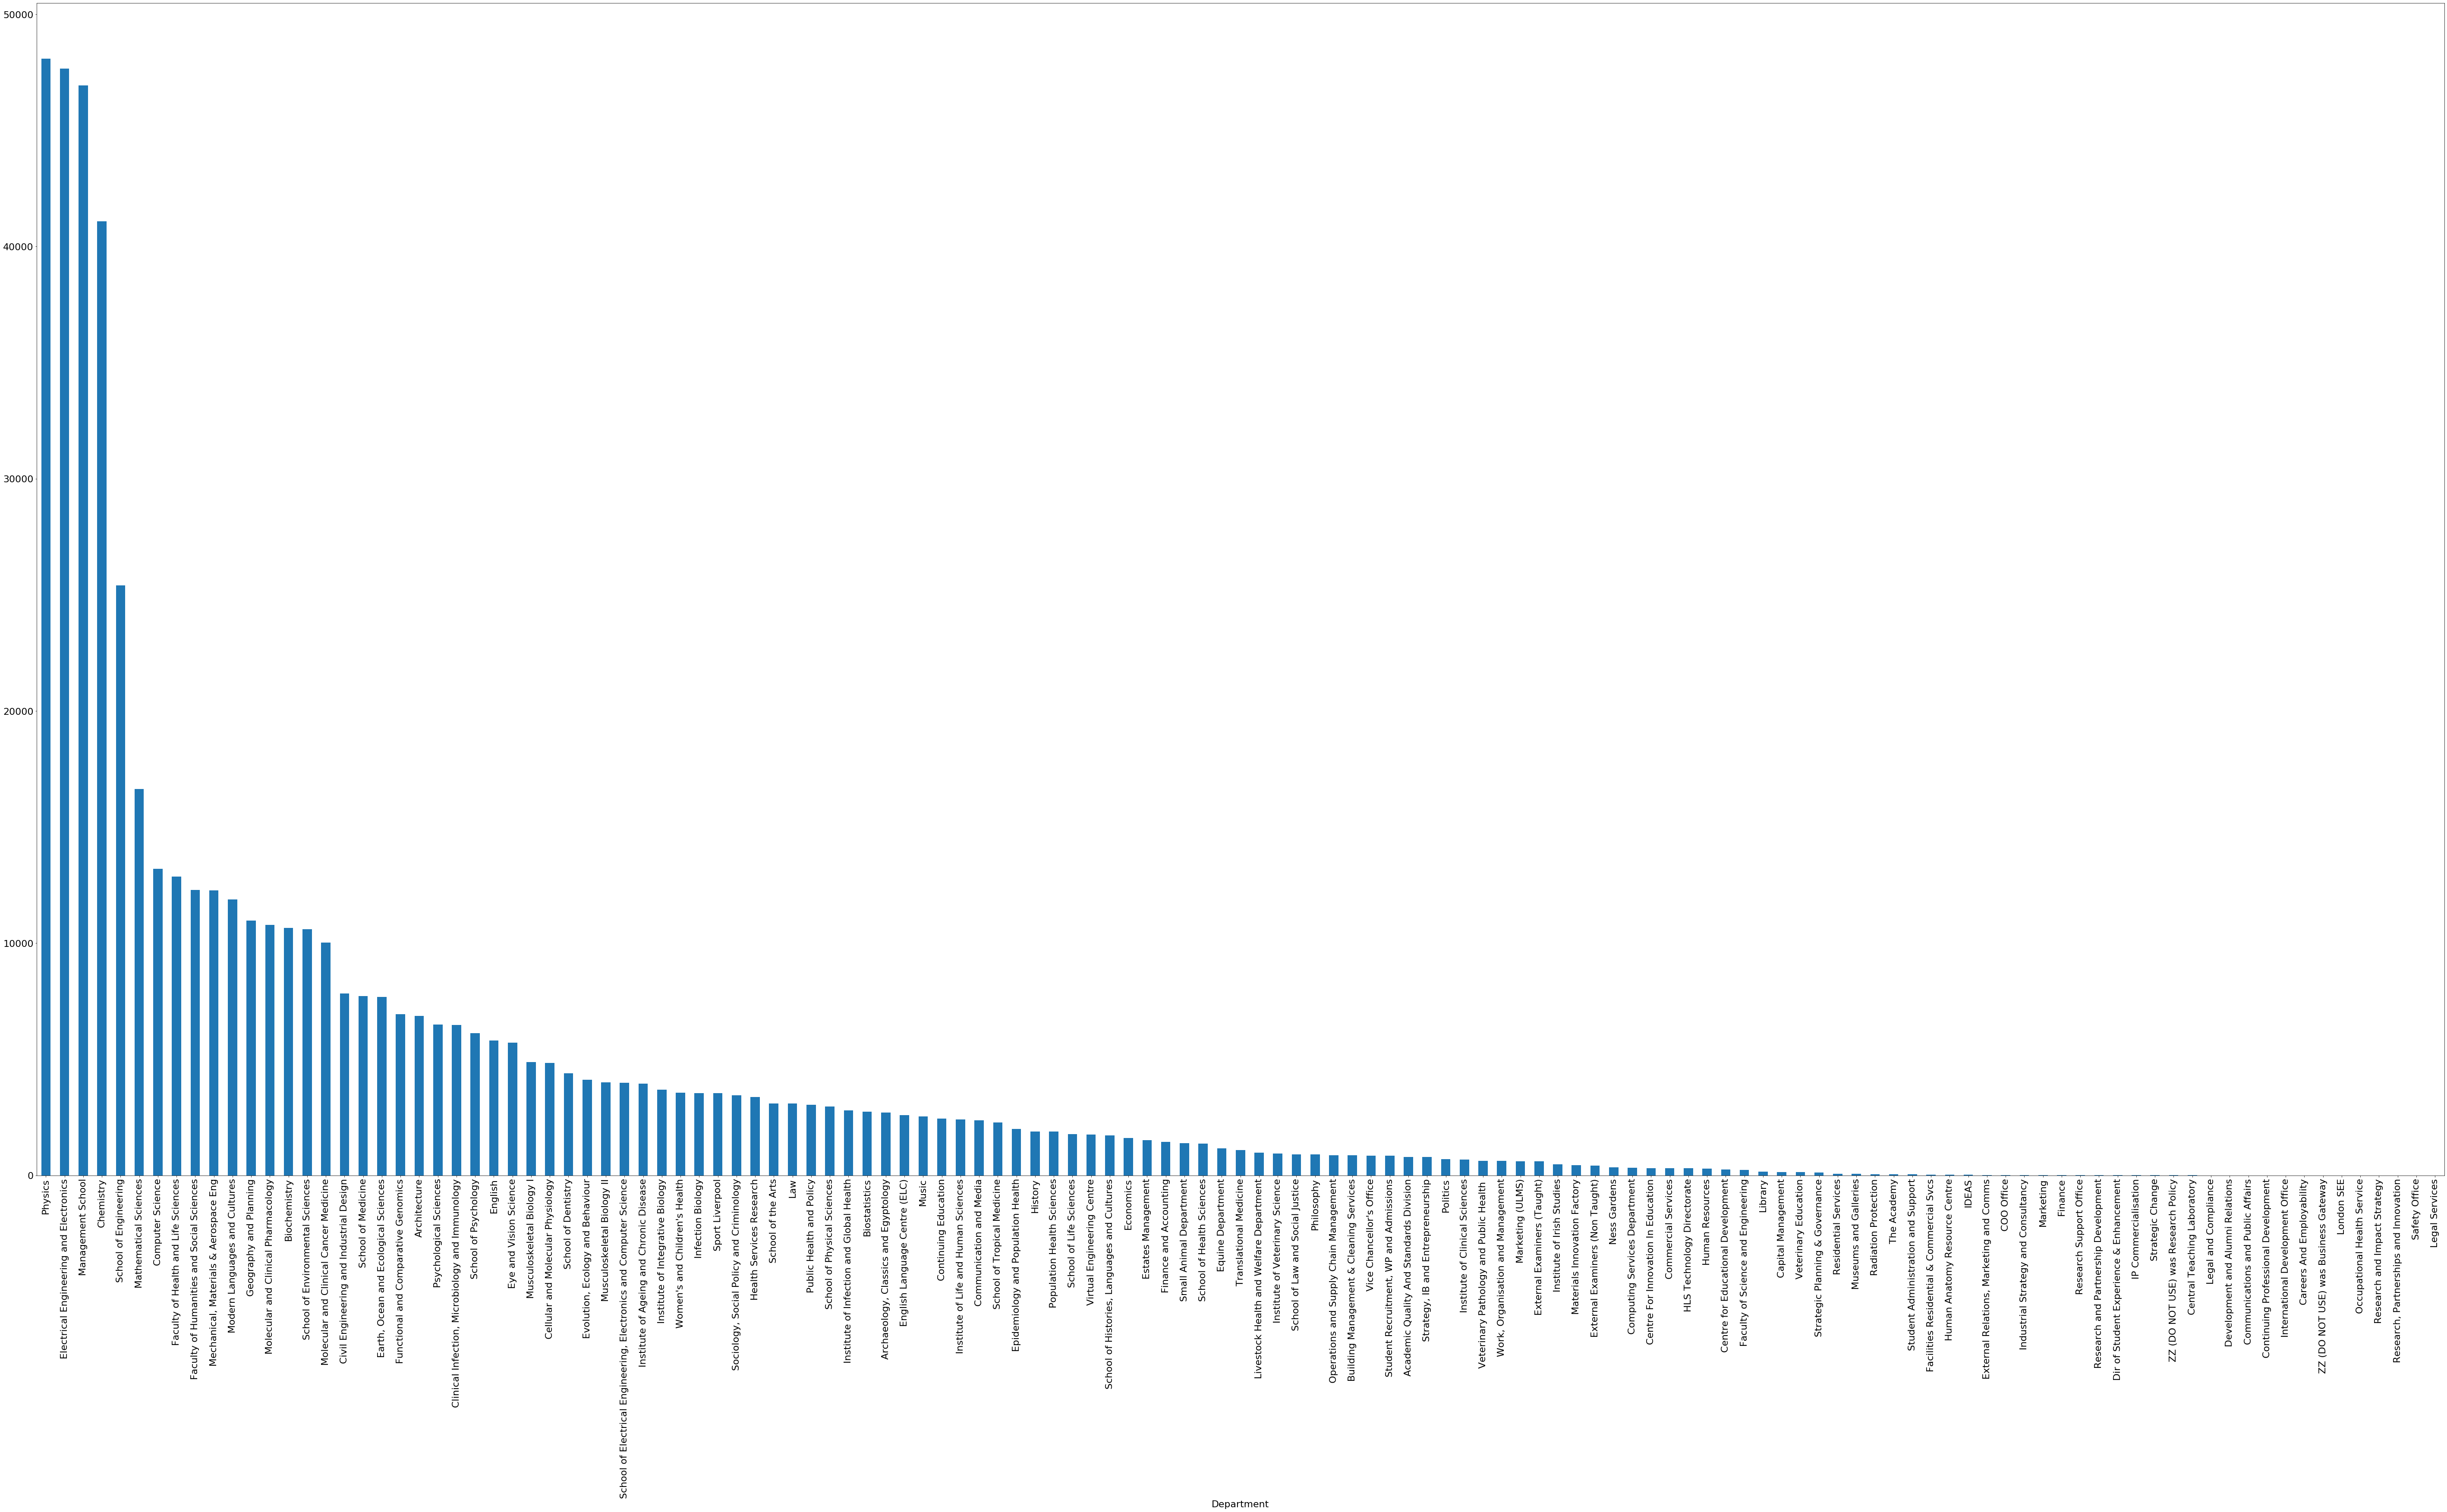

In [48]:
# Plot the distribution of papers published by department
department_aggregate['DOI'].sort_values(ascending=False).plot.bar(x='Department', y='DOI Count', rot=90, figsize=(100, 50))

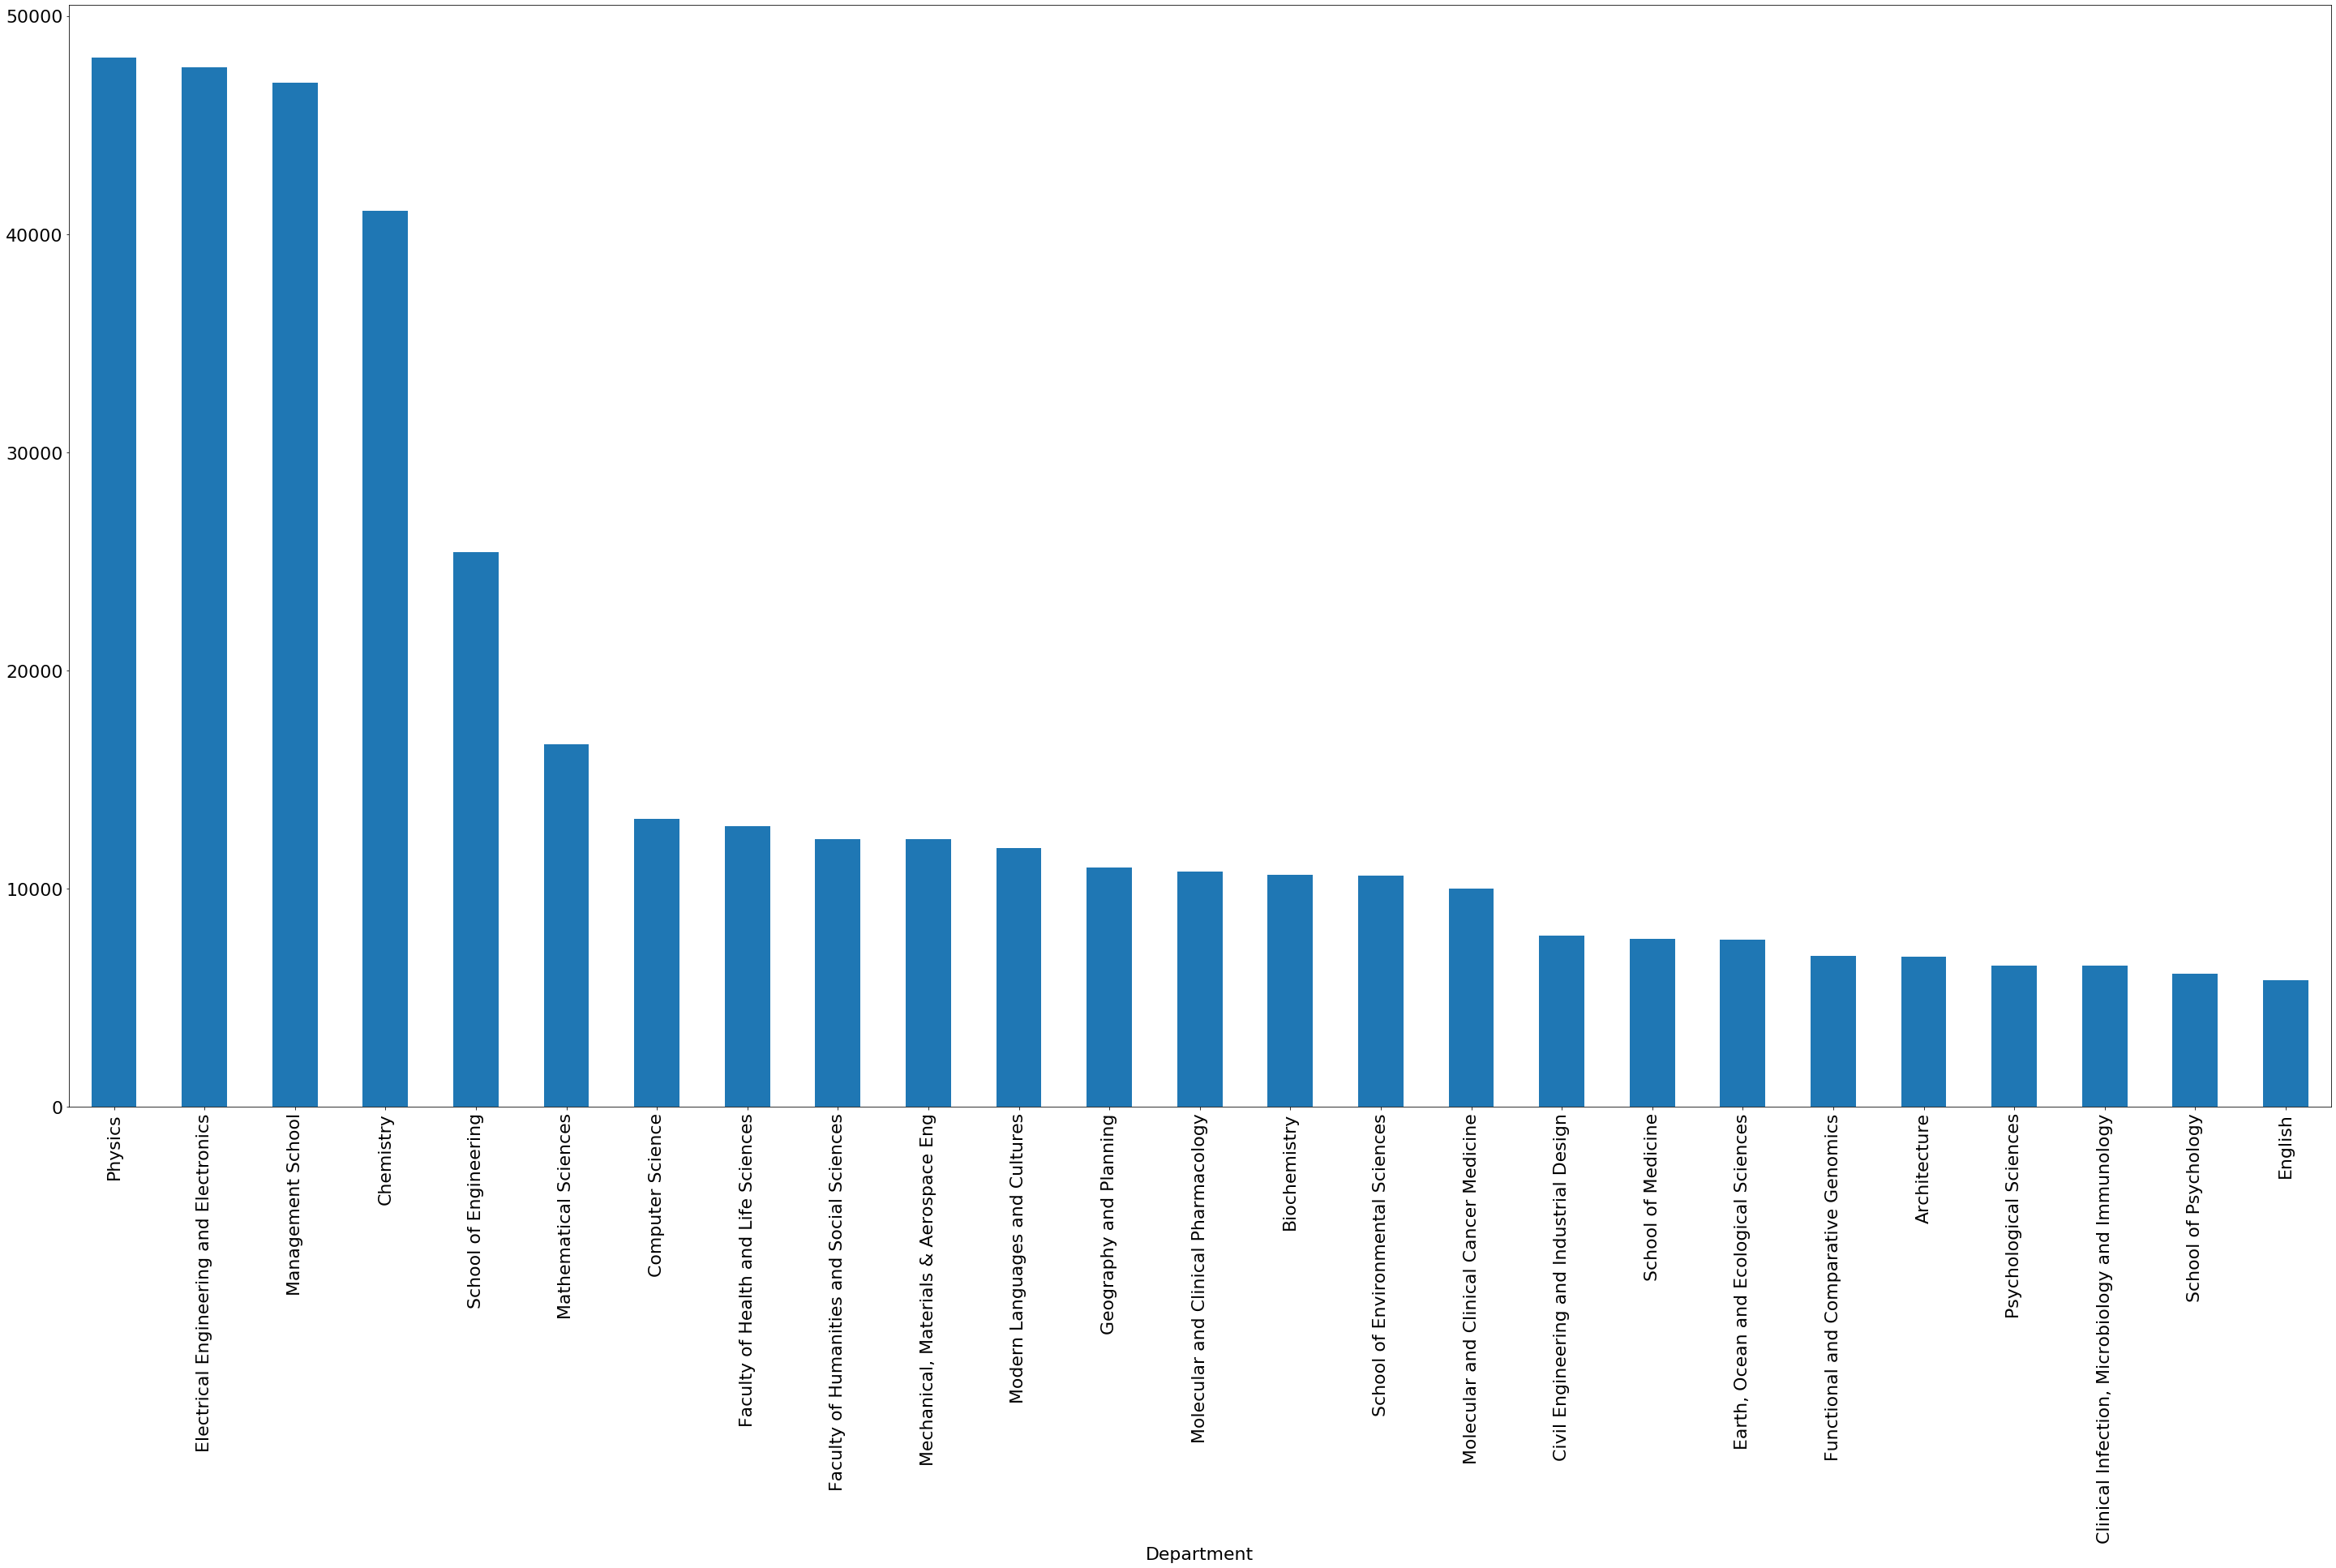

In [51]:
# Lets make it a bit easier to read...
department_aggregate['DOI'].sort_values(ascending=False).head(25).plot.bar(x='Department', y='DOI Count', rot=90, figsize=(50, 25))

In [8]:
# Aggregate papers by author
author_aggregate = df.groupby(['Name']).count()
author_aggregate

,Department,Staff,Authors,Title,DOI
Name,,,,,
"., Anjumunnisa",0,605,605,605,465
"., Rajesh",0,3,3,3,2
"?, ?",0,107,102,103,82
"A'Court, Andrew",6,6,6,6,6
"ALAidarous, Sondus",0,1,1,1,1
...,...,...,...,...,...
"van de Wiel, Kim",0,1,0,0,0
"von Euw, Roland",1,1,1,1,0
"von Goetz, Dominic",1,1,0,0,0


In [8]:
# Top five authors ranked by number of papers published
author_aggregate[['DOI']].sort_values(by=['DOI'], ascending=False).head()

,DOI
Name,
"Wang, Jing",2967
"Yang, Yang",2469
"Lip, Gregory",2371
"Gao, Yan",2228
"González, David",2103


In [10]:
# Top five authors ranked by number of papers published
author_aggregate[['DOI']].sort_values(by=['DOI'], ascending=False).tail()

,DOI
Name,
"Pak, Christopher",0
"Jervis, Jessica",0
"Cardinali, Martina",0
"Palacios Baldeon, Joe",0
"Francis, Priya",0


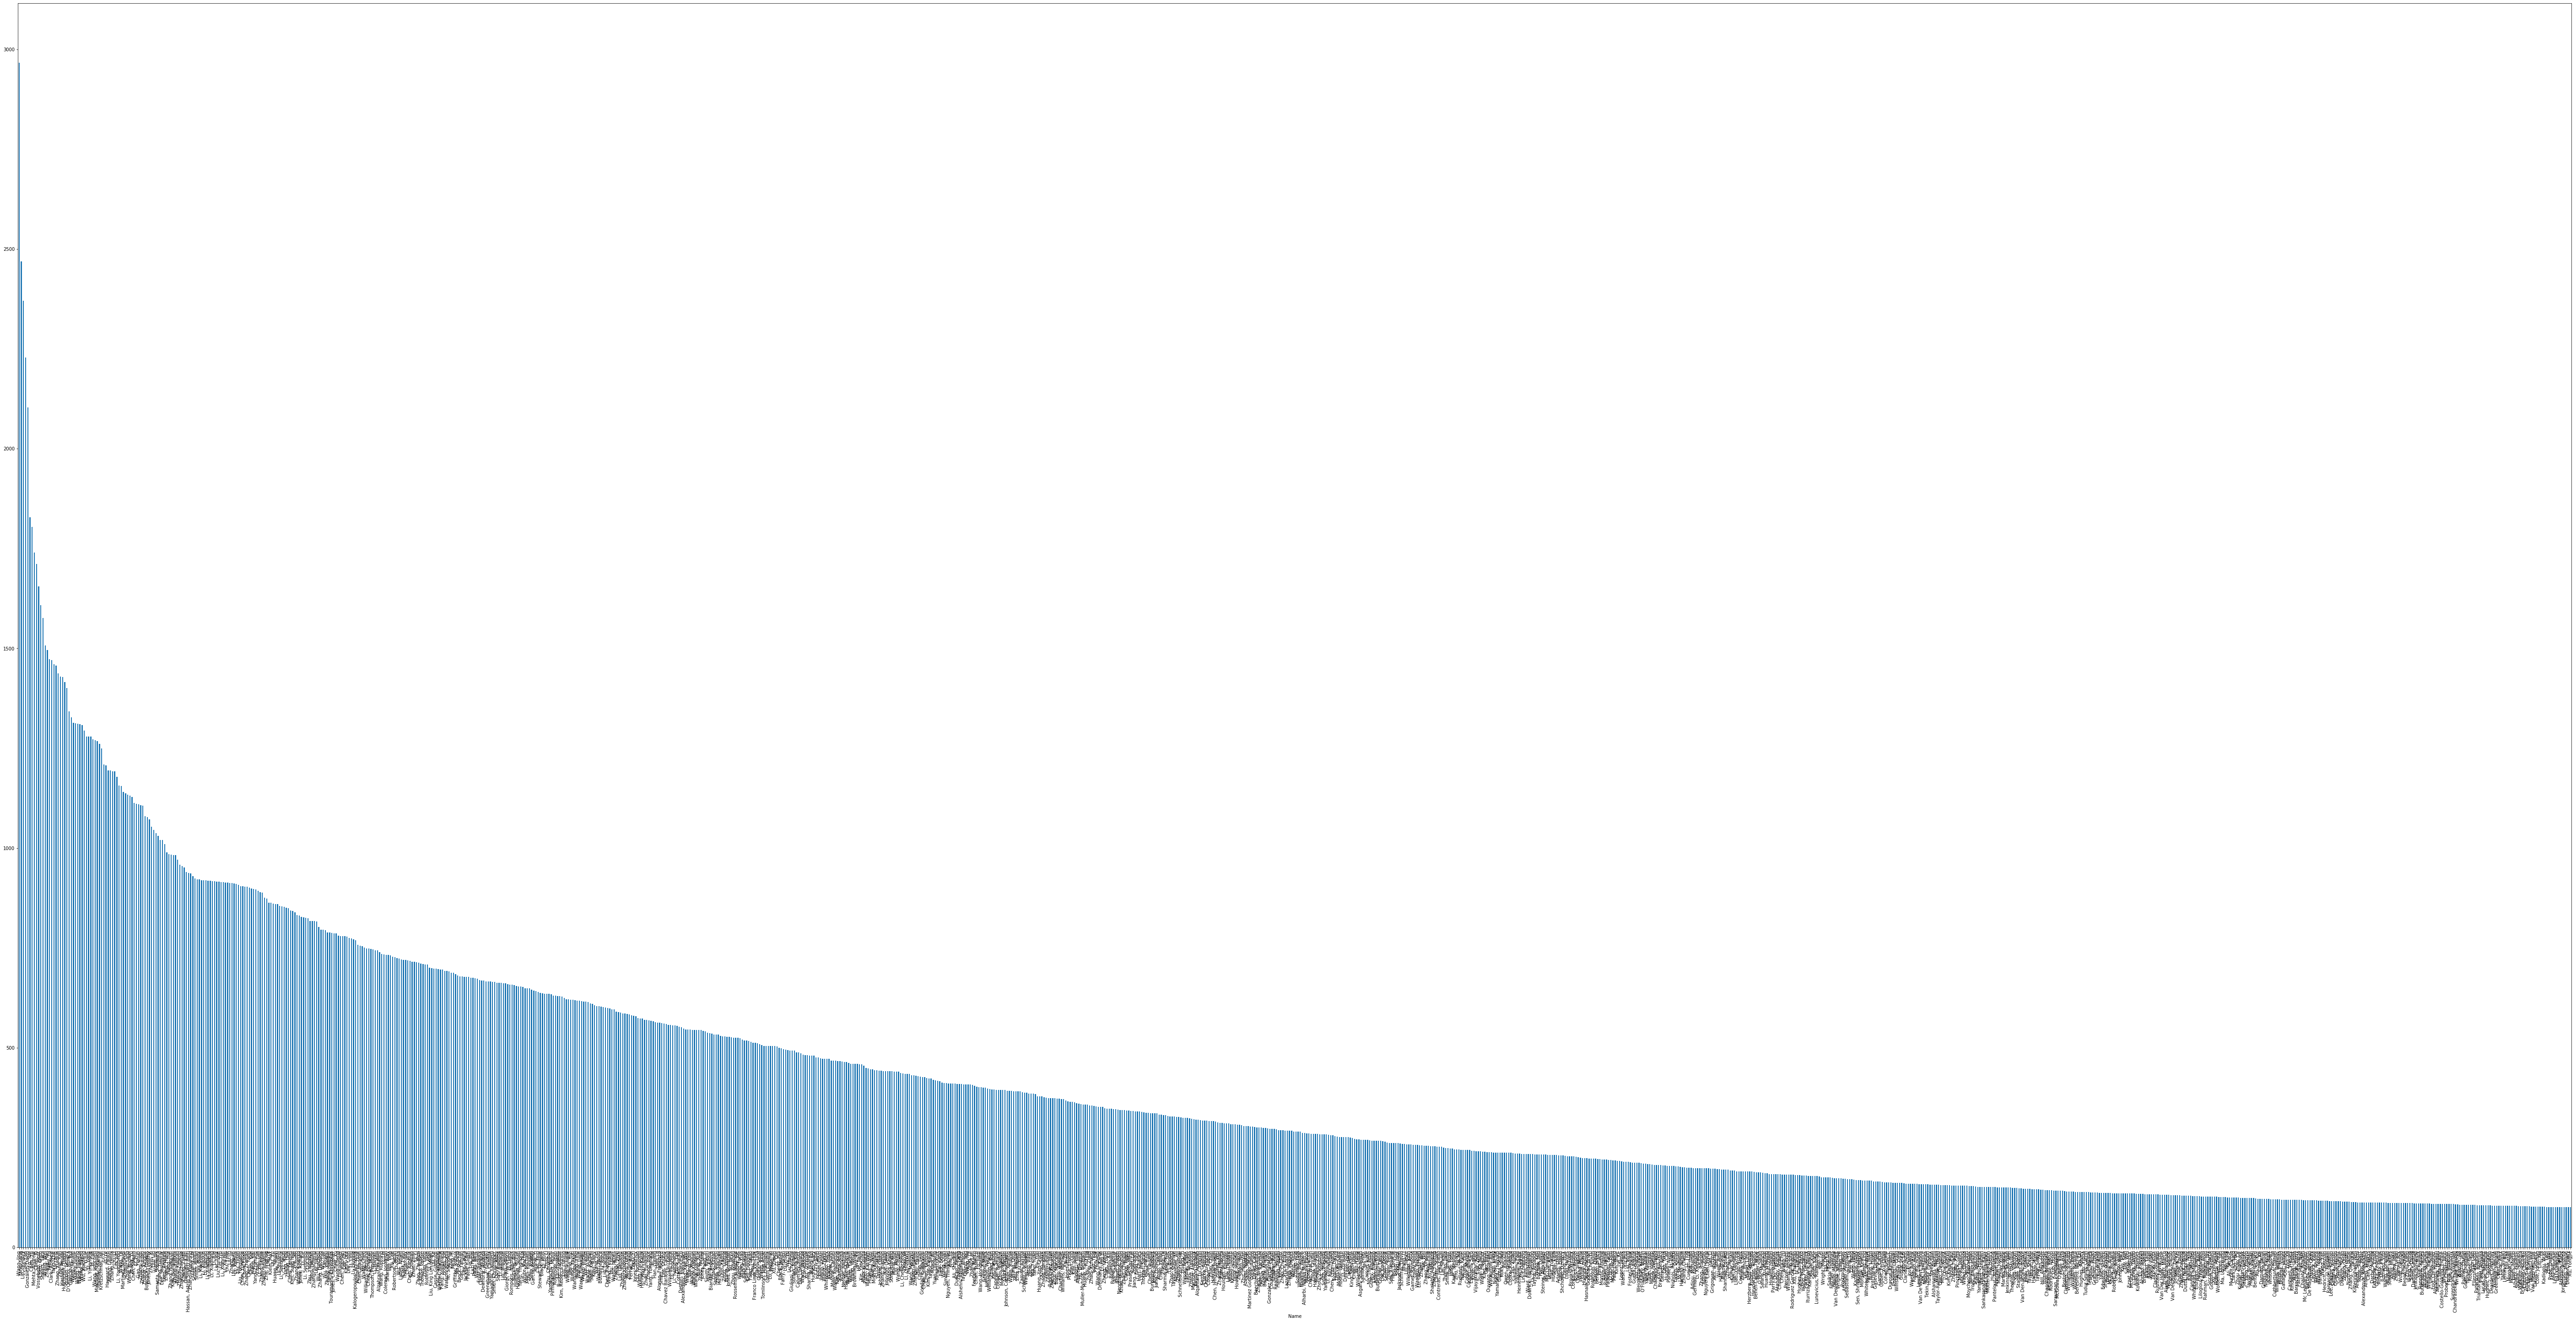

In [4]:
# Visualise number of papers published by each author
author_aggregate[author_aggregate['DOI'] > 100]['DOI'].sort_values(ascending=False).plot.bar(x='Department', y='DOI Count', rot=90, figsize=(100, 50))

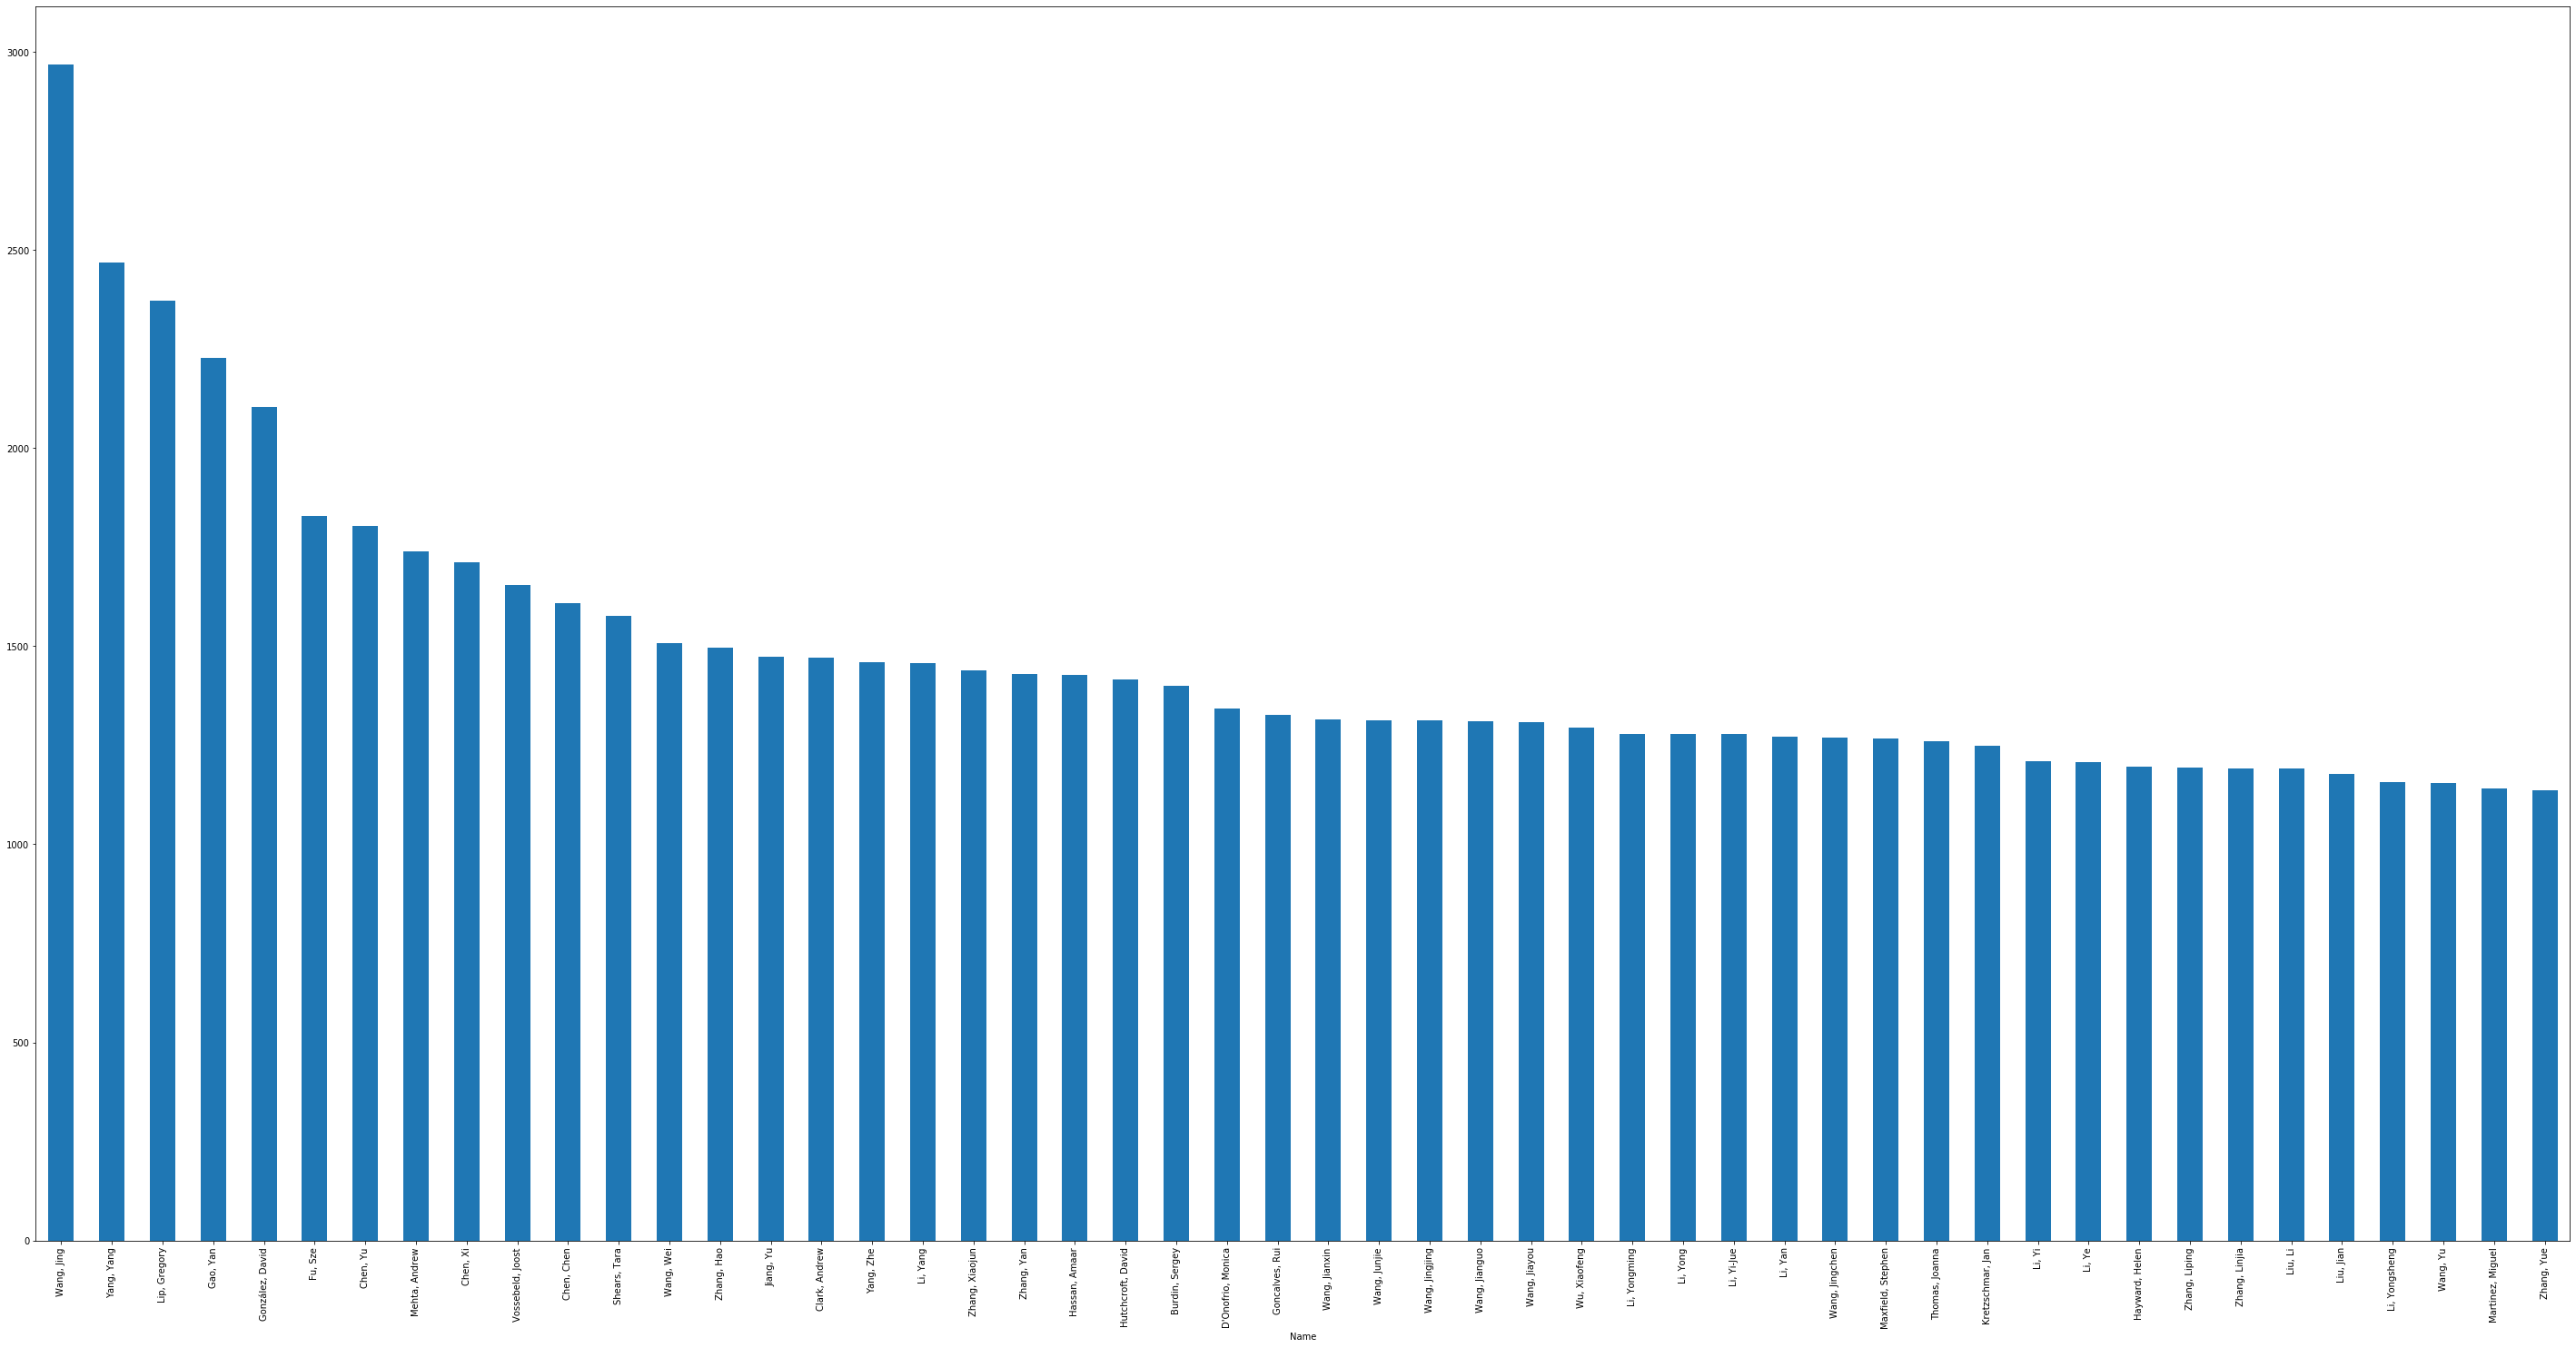

In [4]:
# Lets make it a bit easier to read...
author_aggregate['DOI'].sort_values(ascending=False).head(50).plot.bar(x='Department', y='DOI Count', rot=90, figsize=(50, 25))

In [9]:
# Aggregate papers by department and author
dept_name_aggregate = df.groupby(['Department', 'Name']).count()
dept_name_aggregate

Staff  Authors  \
Department                              Name                                  
Academic Quality And Standards Division Barker, Patricia         1        0   
                                        Billington, Joanne       1        0   
                                        Carroll, Tracy           1        0   
                                        Dixon, Elizabeth         1        0   
                                        Fox, Vivien              1        0   
...                                                            ...      ...   
ZZ (DO NOT USE) was Business Gateway    Unsworth, Andrew         1        0   
ZZ (DO NOT USE) was Research Policy     Alfred, Lindsay          1        0   
                                        Davies, Heather          6        6   
                                        Farquhar, Andrew         1        0   
                                        Prendergast, Rachel      1        0   

                                                             Title  DOI  
Department                              Name                             
Academic Quality And Standards Division Barker, Patricia         0    0  
                                        Billington, Joanne       0    0  
                                        Carroll, Tracy           0    0  
                                        Dixon, Elizabeth         0    0  
                                        Fox, Vivien              0    0  
...                                                            ...  ...  
ZZ (DO NOT USE) was Business Gateway    Unsworth, Andrew         0    0  
ZZ (DO NOT USE) was Research Policy     Alfred, Lindsay          0    0  
                                        Davies, Heather          6    6  
                                        Farquhar, Andrew         0    0  
                                        Prendergast, Rachel      0    0  

[18672 rows x 4 columns]

In [13]:
dept_name_aggregate[dept_name_aggregate['DOI'] > 1000].describe()

,Staff,Authors,Title,DOI
count,45.000000,45.000000,45.000000,45.000000
mean,1417.333333,1414.555556,1417.311111,1286.555556
std,389.310404,387.776386,389.245355,280.554366
min,1036.000000,1035.000000,1036.000000,1010.000000
25%,1137.000000,1137.000000,1137.000000,1109.000000
50%,1303.000000,1298.000000,1303.000000,1249.000000
75%,1505.000000,1491.000000,1505.000000,1318.000000
max,2708.000000,2702.000000,2708.000000,2371.000000


In [30]:
dept_name_aggregate['DOI'].unstack('Department')['Architecture'].dropna()

Name
Abd Latif, Siti Hajar Sufini Binti      0.0
Abuhussain, Mohammed                    1.0
Agkathidis, Asterios                    6.0
Ahmad Shafandi, Sharonnizam             0.0
Aksenova, Gulnaz                        1.0
                                      ...  
Zamarian, Patrick                       1.0
Zhang, Ran                            396.0
Zhao, Jiangyang                        85.0
Zhao, Wei                              58.0
Zuo, Yaqin                              3.0
Name: Architecture, Length: 300, dtype: float64

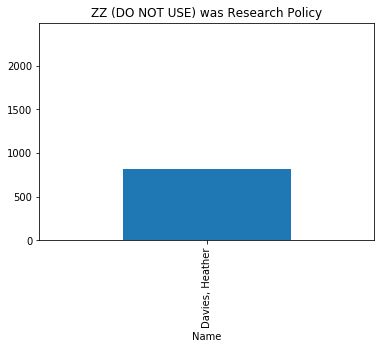

In [33]:
# dept_name_aggregate[dept_name_aggregate['DOI'] > 0]['DOI'].unstack('Department').plot.bar(rot=90, figsize=(25,100), subplots=True)

for col in dept_name_aggregate['DOI'].unstack('Department').columns:
    try:
        dept_name_aggregate[dept_name_aggregate['DOI'] > 5]['DOI'].unstack('Department')[col].dropna().plot.bar(x='Author', y='# of Publications', title=col)
    except:
        continue